## 对twitter数据集进行数据清洗和分析

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns

## 读取，TXT转CSV

In [5]:
txt_file = r"./mediaeval2016/test_posts.txt"  
csv_file = r"./mediaeval2016/test_posts.csv"

in_txt = csv.reader(open(txt_file, "r"), delimiter = '\t')
out_csv = csv.writer(open(csv_file, 'w'))

out_csv.writerows(in_txt)

## 加载数据

In [6]:
def load_tweets_data(name): 
    csv_path = os.path.join("./mediaeval2016/", name) 
    return pd.read_csv(csv_path)

trainTweets = load_tweets_data("train_posts.csv")
testTweets = load_tweets_data("test_posts.csv")

## 基本情况

In [7]:
trainTweets.shape, testTweets.shape, trainTweets.info(), testTweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15629 entries, 0 to 15628
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   post_id      15629 non-null  int64 
 1   post_text    15629 non-null  object
 2   user_id      15629 non-null  int64 
 3   image_id(s)  15629 non-null  object
 4   username     15629 non-null  object
 5   timestamp    15629 non-null  object
 6   label        15629 non-null  object
dtypes: int64(2), object(5)
memory usage: 854.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   post_id    2157 non-null   int64  
 1   post_text  2157 non-null   object 
 2   user_id    2157 non-null   float64
 3   username   2157 non-null   object 
 4   image_id   2157 non-null   object 
 5   timestamp  2157 non-null   object 
 6   label      2157 non-null   object 
dtype

((15629, 7), (2157, 7), None, None)

## 去除无关列

In [11]:
trainTweets.drop(["timestamp"],axis=1,inplace=True)
trainTweets.drop(["post_id"],axis=1,inplace=True)
trainTweets.drop(["user_id"],axis=1,inplace=True)
trainTweets.drop(["username"],axis=1,inplace=True)

trainTweets.info(), trainTweets.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15629 entries, 0 to 15628
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   post_text    15629 non-null  object
 1   image_id(s)  15629 non-null  object
 2   label        15629 non-null  object
dtypes: object(3)
memory usage: 366.4+ KB


(None, (15629, 3))

## 文本预处理

In [12]:
# 转小写
trainTweets['post_text'] = trainTweets['post_text'].apply(lambda x: x.lower())
trainTweets.head()

# 删除标点
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

trainTweets['post_text'] = trainTweets['post_text'].apply(punctuation_removal)
trainTweets.head()

# 删除英文停用词
nltk.download('stopwords')
stop = stopwords.words('english')
trainTweets['post_text'] = trainTweets['post_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

trainTweets.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhongshannan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,post_text,image_id(s),label
0,dont need feds solve bostonbombing 4chan httpt...,"boston_fake_03,boston_fake_35",fake
1,pic comparison boston suspect sunil tripathis ...,boston_fake_23,fake
2,im completely convinced sunil tripathi fellow—...,boston_fake_34,fake
3,brutal lo que se puede conseguir en colaboraci...,"boston_fake_03,boston_fake_35",fake
4,4chan bombing throwing httptcodiyso7lxqm httpt...,boston_fake_15,fake


## 生成event列

In [15]:
# 生成topic列
event = [] 
for value in trainTweets["image_id(s)"]: 
    event.append(str(value).split("_")[0])
                  
trainTweets["event"] = event    
trainTweets.head()


,post_text,image_id(s),label,event
0,dont need feds solve bostonbombing 4chan httpt...,"boston_fake_03,boston_fake_35",fake,boston
1,pic comparison boston suspect sunil tripathis ...,boston_fake_23,fake,boston
2,im completely convinced sunil tripathi fellow—...,boston_fake_34,fake,boston
3,brutal lo que se puede conseguir en colaboraci...,"boston_fake_03,boston_fake_35",fake,boston
4,4chan bombing throwing httptcodiyso7lxqm httpt...,boston_fake_15,fake,boston


## 统计计数

In [20]:
# 真假新闻统计
trainTweets['label'].value_counts()

fake    9404
real    6225
Name: label, dtype: int64

In [17]:
# 事件统计
trainTweets['event'].value_counts()

sandy                 10222
syrianboy              1786
nepal                  1360
boston                  533
malaysia                310
eclipse                 277
sochi                   274
samurai                 218
columbianChemicals      185
bringback               131
underwater              113
garissa                  79
varoufakis               61
passport                 44
pigFish                  14
elephant                 13
livr                      9
Name: event, dtype: int64

## 可视分析

In [23]:
# 话题
event = trainTweets.event.unique()
print(event,len(event))

['boston' 'malaysia' 'passport' 'sandy' 'sochi' 'bringback'
 'columbianChemicals' 'elephant' 'livr' 'pigFish' 'underwater' 'eclipse'
 'samurai' 'nepal' 'garissa' 'syrianboy' 'varoufakis'] 17


label
fake    9404
real    6225
Name: post_text, dtype: int64


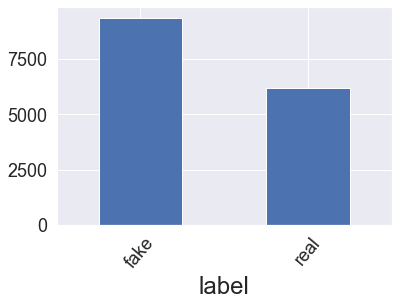

In [64]:
# 训练集真假比率
print(trainTweets.groupby(['label'])['post_text'].count())
trainTweets.groupby(['label'])['post_text'].count().plot(kind='bar', fontsize=18)
plt.xticks(rotation=50) 
plt.show()

In [78]:
# 词云
event_words = list(trainTweets.event.unique())
en_stop_words = nltk.corpus.stopwords.words('english')
sp_stop_words = nltk.corpus.stopwords.words('spanish')
twitter = ['rt', 'http', 'co','https','nhttp','nhttps']

# 完整停用词 由英文停用词、西班牙文停用词、事件词汇、rt构成
block_words = en_stop_words + sp_stop_words + event_words + twitter

In [79]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# 自定义图层颜色
from matplotlib.colors import LinearSegmentedColormap
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

def generate_word_cloud(input_tweets):
    tweets = input_tweets
    tweets_text = " ".join(tweets.post_text.to_numpy().tolist())
    
    # 词云
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='White', colormap=cmap, collocations=False, stopwords = block_words).generate(tweets_text)
    plt.figure(figsize=(16,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') # 关闭轴
    plt.show()
    wordcloud.to_file("real.png")

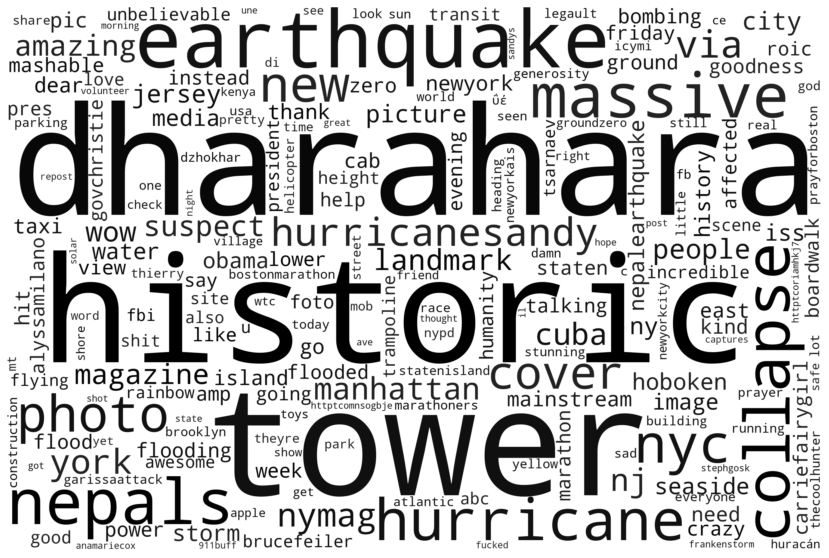

In [48]:
# 展示真实新闻的词云图
generate_word_cloud(trainTweets[trainTweets['label'] == 'real'])

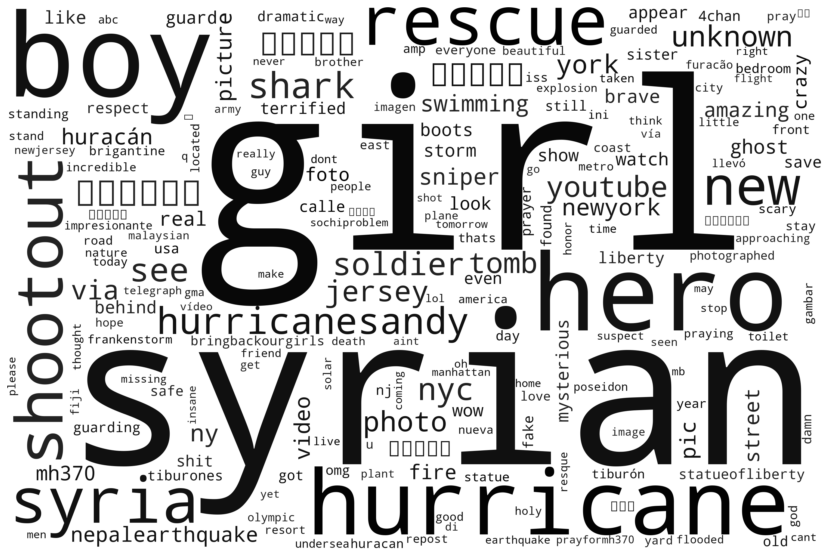

In [49]:
# 展示虚假新闻的词云图
generate_word_cloud(trainTweets[trainTweets['label'] == 'fake'])

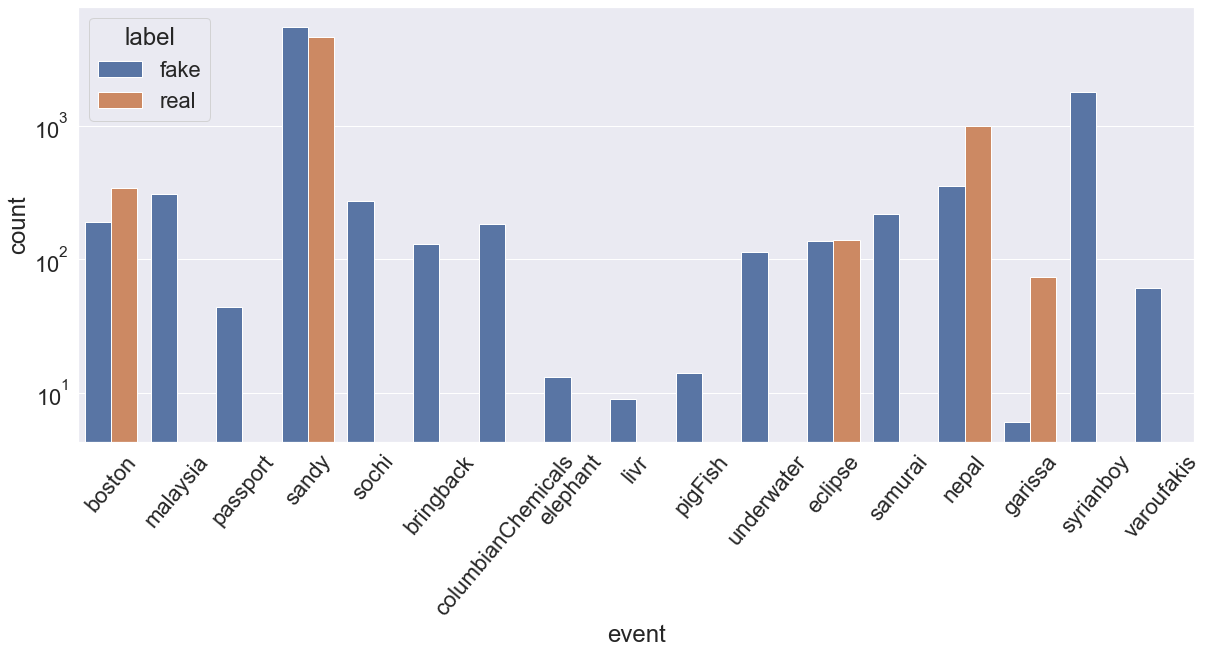

In [52]:
# 不同事件的真假新闻分布
sns.set_theme(style="ticks", color_codes=True)

plt.figure(figsize=(20, 8))
sns.set(font_scale=2)  # crazy big

ax = sns.countplot(x="event", hue="label", data=trainTweets)
ax.set_yscale("log")
plt.xticks(rotation=50) # 坐标轴倾斜角度70度
plt.show()

# 对测试集进行简单分析

In [55]:
testTweets.drop(["timestamp"],axis=1,inplace=True)
testTweets.drop(["post_id"],axis=1,inplace=True)
testTweets.drop(["user_id"],axis=1,inplace=True)
testTweets.drop(["username"],axis=1,inplace=True)

# 生成event列
event = [] 
for value in testTweets["image_id"]: 
    event.append(str(value).split("_")[0])
                  
testTweets["event"] = event    
testTweets.head()

,post_text,image_id,label,event
0,"#AntiTerror ""#ArabianBlood"" #RussianFederation...",airstrikes_1,fake,airstrikes
1,"#АнтиТеррор ""#АрабскаяКровь"" #РФ в #Сирии прот...",airstrikes_1,fake,airstrikes
2,"Ну чё, сегодня надавали трендюлей игиловцам по...",airstrikes_1,fake,airstrikes
3,Действия России в Сирии безукоризненны. Видео...,airstrikes_1,fake,airstrikes
4,5-10-2015\nThe airstrike against an ISIS ammun...,airstrikes_1,fake,airstrikes


In [56]:
testTweets['label'].value_counts()

fake    1174
real     983
Name: label, dtype: int64

In [60]:
testTweets['event'].value_counts(), 

(attacks       579
 eagle         303
 syrian        204
 fuji          170
 brussels      119
 bowie          72
 refugees       68
 not            67
 protest        64
 pakistan       53
 immigrants     51
 half           39
 rio            33
 boko           31
 gandhi         29
 pope           29
 bush           27
 donald         25
 burst          25
 airstrikes     24
 john           20
 ankara         19
 hubble         18
 american       17
 snowboard      14
 convoy         13
 nazi           11
 north          10
 black           7
 mc              6
 five            6
 isis            3
 soldier         1
 Name: event, dtype: int64,)

In [62]:
event = testTweets.event.unique()
print(event,len(event))

['airstrikes' 'american' 'ankara' 'attacks' 'black' 'boko' 'bowie'
 'brussels' 'burst' 'bush' 'convoy' 'donald' 'eagle' 'five' 'fuji'
 'gandhi' 'half' 'hubble' 'immigrants' 'isis' 'john' 'mc' 'nazi' 'north'
 'not' 'pakistan' 'pope' 'protest' 'refugees' 'rio' 'snowboard' 'soldier'
 'syrian'] 33


label
fake    1174
real     983
Name: post_text, dtype: int64


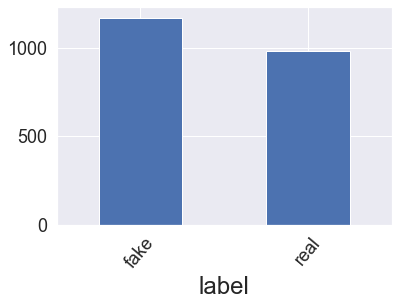

In [63]:
# 测试集真假比率
print(testTweets.groupby(['label'])['post_text'].count())
testTweets.groupby(['label'])['post_text'].count().plot(kind='bar', fontsize=18)
plt.xticks(rotation=50) 
plt.show()

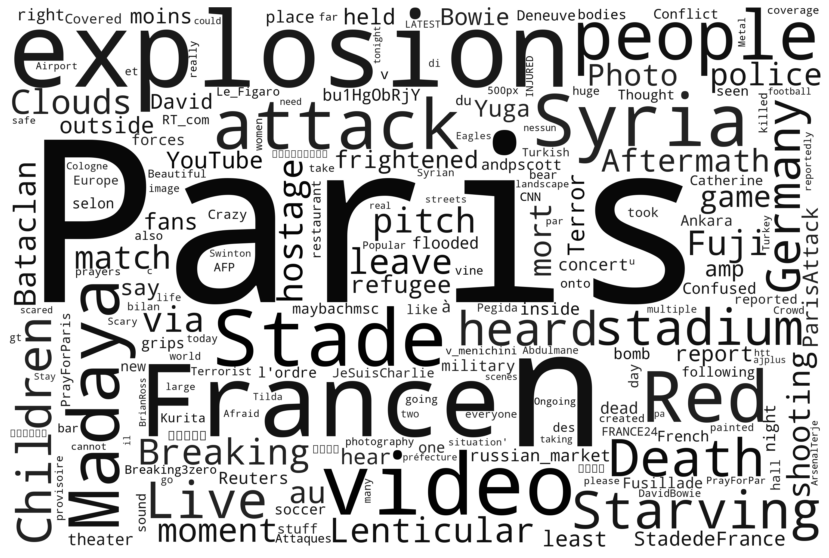

In [80]:
# 展示测试集 真实新闻的词云图
generate_word_cloud(testTweets[testTweets['label'] == 'real'])

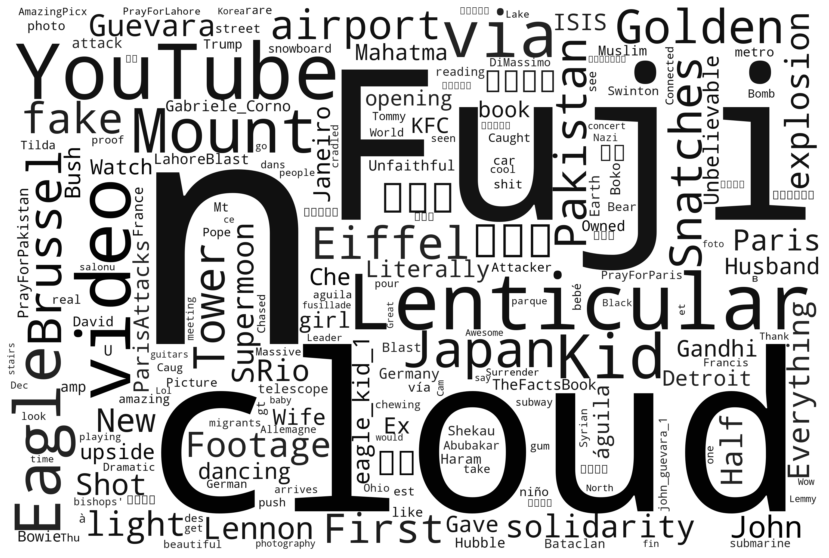

In [81]:
# 展示测试集 虚假新闻的词云图
generate_word_cloud(testTweets[testTweets['label'] == 'fake'])

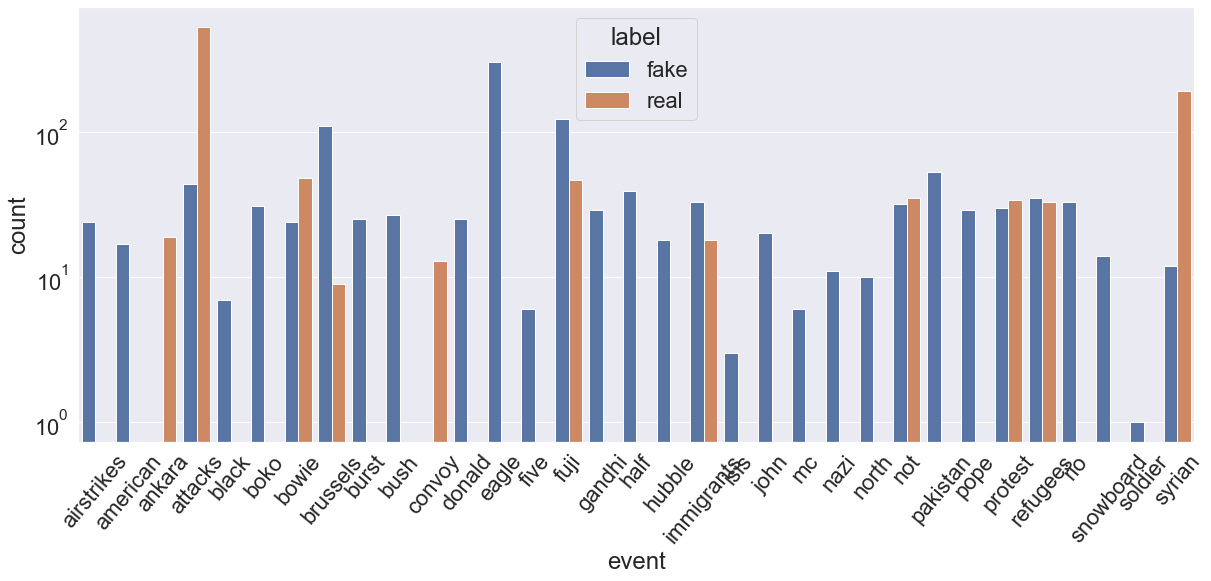

In [67]:
# 测试集 不同事件的真假新闻分布
sns.set_theme(style="ticks", color_codes=True)

plt.figure(figsize=(20, 8))
sns.set(font_scale=2)  # crazy big

ax = sns.countplot(x="event", hue="label", data=testTweets)
ax.set_yscale("log")
plt.xticks(rotation=50) # 坐标轴倾斜角度70度
plt.show()